In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datasets

In [27]:
SFU_2013to2024 = pd.read_excel("EP_data_SFU.xlsx", sheet_name="SFU 2013 - 2024")

df = SFU_2013to2024.sort_values("GPA")
df.head(6)



,Backgrounds,Signed up,Applied,Accepted,Approved,Realized,Finished,Completed,Gender,GPA,Funding,Length of Exchange,Motivation,Number of Destinations,English Proficiency,Prior International Experience,SFU Campus,Co-op Participation
24,Political science,32,128,18,5,5,0,1,Male,0.17,Yes,6,Cultural,3,41,No,Surrey,Yes
42,Media Arts,12,41,2,1,1,0,0,Female,0.18,No,1,Personal Growth,2,17,No,Burnaby,Yes
39,Earth Sciences,1,10,5,1,1,0,0,Male,0.30,No,7,Career,3,98,No,Surrey,No
50,Industrial engineering,1,22,0,0,0,0,0,Male,0.35,No,2,Personal Growth,3,49,No,Burnaby,No
14,Accounting,51,122,14,7,7,0,0,Female,0.37,No,2,Career,5,2,No,Burnaby,Yes
11,Law,19,66,11,9,8,0,1,Male,0.39,No,4,Personal Growth,4,93,No,Surrey,No


C:\Users\melvi\AppData\Local\Temp\ipykernel_59300\3232354508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=campus_applied, x='SFU Campus', y='Applied', palette='colorblind')


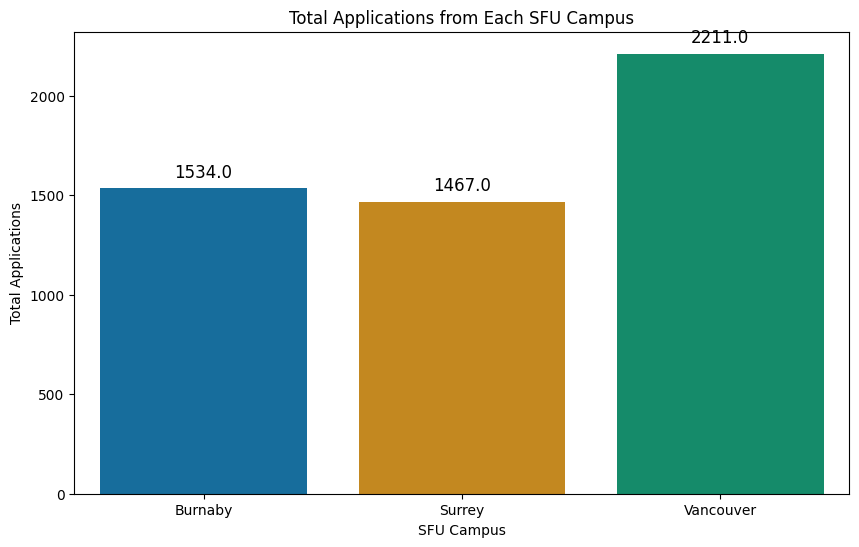

In [28]:
campus_applied = df.groupby('SFU Campus')['Applied'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=campus_applied, x='SFU Campus', y='Applied', palette='colorblind')

plt.title("Total Applications from Each SFU Campus")
plt.xlabel("SFU Campus")
plt.ylabel("Total Applications")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=12)

plt.show()

C:\Users\melvi\AppData\Local\Temp\ipykernel_59300\1883596437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=motivation_applied, x='Motivation', y='Applied', palette='Set1')


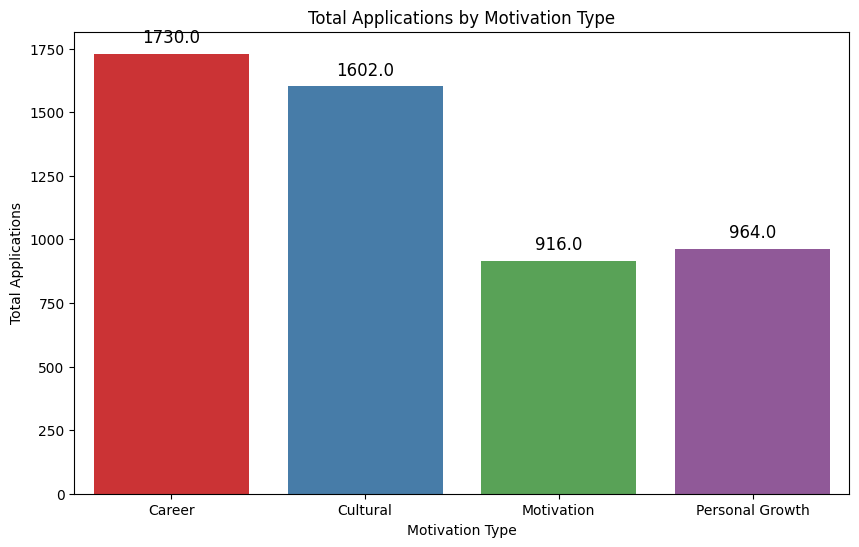

In [ ]:
motivation_applied = df.groupby('Motivation')['Applied'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=motivation_applied, x='Motivation', y='Applied', palette='Set1')

plt.title("Total Applications by Motivation Type")
plt.xlabel("Motivation Type")
plt.ylabel("Total Applications")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=12)

plt.show()

Now, we will look at the correlation matrix to eliminate variables

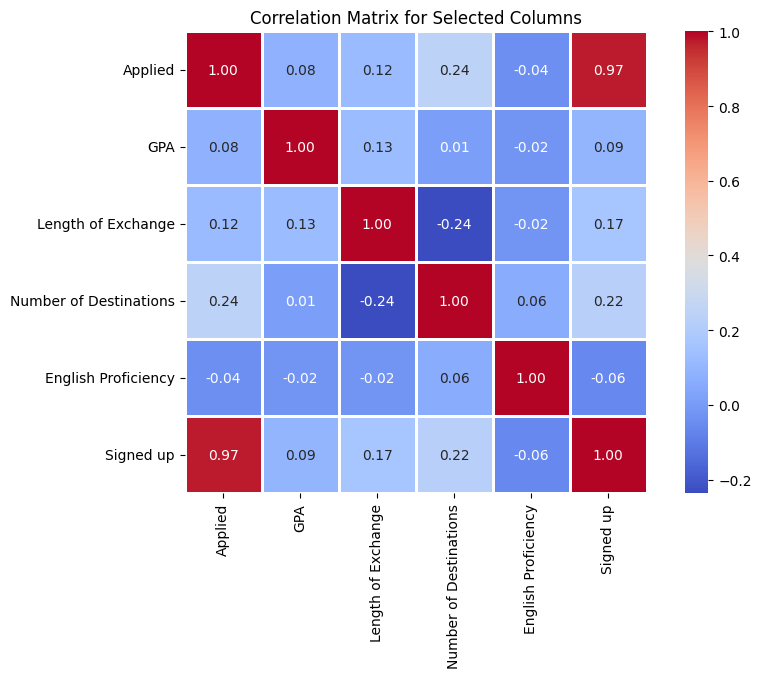

In [30]:
correlation_matrix = df[["Applied", "GPA", "Length of Exchange", "Number of Destinations", "English Proficiency", "Signed up"]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title("Correlation Matrix for Selected Columns")
plt.show()

In [31]:
df.drop(['GPA', 'English Proficiency'], axis=1, inplace=True)
df.head()

,Backgrounds,Signed up,Applied,Accepted,Approved,Realized,Finished,Completed,Gender,Funding,Length of Exchange,Motivation,Number of Destinations,Prior International Experience,SFU Campus,Co-op Participation
24,Political science,32,128,18,5,5,0,1,Male,Yes,6,Cultural,3,No,Surrey,Yes
42,Media Arts,12,41,2,1,1,0,0,Female,No,1,Personal Growth,2,No,Burnaby,Yes
39,Earth Sciences,1,10,5,1,1,0,0,Male,No,7,Career,3,No,Surrey,No
50,Industrial engineering,1,22,0,0,0,0,0,Male,No,2,Personal Growth,3,No,Burnaby,No
14,Accounting,51,122,14,7,7,0,0,Female,No,2,Career,5,No,Burnaby,Yes
